<a href="https://colab.research.google.com/github/mleyvaz/AV/blob/master/Proyecto_M2L.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pycaret
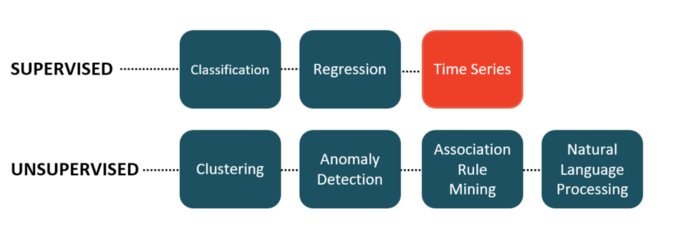

# Intalación

In [10]:
pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.1.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (25 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [11]:
pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.0.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (31 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


# Ciclo de vida de un proyecto de Machine Learning
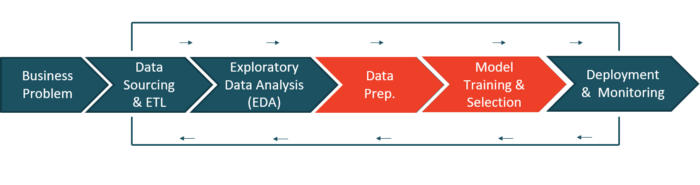

# Problema Comprar un Diamante

Datos

In [12]:
# load the dataset from pycaret
from pycaret.datasets import get_data
data = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


Análisis exploratorio se datos

In [13]:
# plot scatter carat_weight and Price
import plotly.express as px
fig = px.scatter(x=data['Carat Weight'], y=data['Price'], 
                 facet_col = data['Cut'], opacity = 0.25, template = 'plotly_dark', trendline='ols',
                 trendline_color_override = 'red', title = 'SARAH GETS A DIAMOND - A CASE STUDY')
fig.show()

Preparacion de los datos

In [14]:
# initialize setup
from pycaret.regression import *
s = setup(data, target = 'Price', transform_target = True, log_experiment = True, experiment_name = 'diamond')

,Description,Value
0,session_id,5506
1,Target,Price
2,Original Data,"(6000, 8)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(4199, 28)"


Seleccionar Modelo 

In [15]:
# compare all models
best = compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,627.0547,1.822364e+06,1340.9309,0.9827,0.0668,0.0486,0.126
gbr,Gradient Boosting Regressor,761.1366,2.317642e+06,1510.0997,0.9778,0.0772,0.0578,0.312
rf,Random Forest Regressor,737.0652,2.350789e+06,1519.8471,0.9776,0.0788,0.0579,1.147
et,Extra Trees Regressor,753.7436,2.438707e+06,1548.5719,0.9767,0.0810,0.0598,1.243
dt,Decision Tree Regressor,956.4723,3.845371e+06,1936.8545,0.9633,0.1027,0.0757,0.040
ada,AdaBoost Regressor,2066.2756,1.798057e+07,4229.7283,0.8285,0.1917,0.1549,0.284
knn,K Neighbors Regressor,3031.1950,3.606376e+07,5992.0358,0.6544,0.3610,0.2297,0.091
omp,Orthogonal Matching Pursuit,3417.5857,9.383381e+07,9544.7038,0.1071,0.2858,0.2246,0.027
llar,Lasso Least Angle Regression,6576.6177,1.176363e+08,10835.7778,-0.1238,0.7137,0.5613,0.316
lasso,Lasso Regression,6576.6183,1.176362e+08,10835.7741,-0.1238,0.7137,0.5613,0.041


In [16]:
# Modelo paralelo
lightgbm = create_model('lightgbm',  multi_core = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,614.4933,1.428286e+06,1195.1093,0.9854,0.0627,0.0477
1,590.1125,1.129490e+06,1062.7744,0.9872,0.0674,0.0504
2,653.2371,1.859439e+06,1363.6125,0.9830,0.0743,0.0536
3,657.7559,1.649613e+06,1284.3727,0.9828,0.0679,0.0492
4,613.1688,2.807230e+06,1675.4791,0.9741,0.0650,0.0474
5,624.7183,1.764535e+06,1328.3579,0.9846,0.0610,0.0452
6,676.6320,1.678561e+06,1295.5930,0.9848,0.0703,0.0509
7,613.6113,1.981496e+06,1407.6561,0.9813,0.0676,0.0476
8,580.3853,2.206224e+06,1485.3364,0.9789,0.0631,0.0450


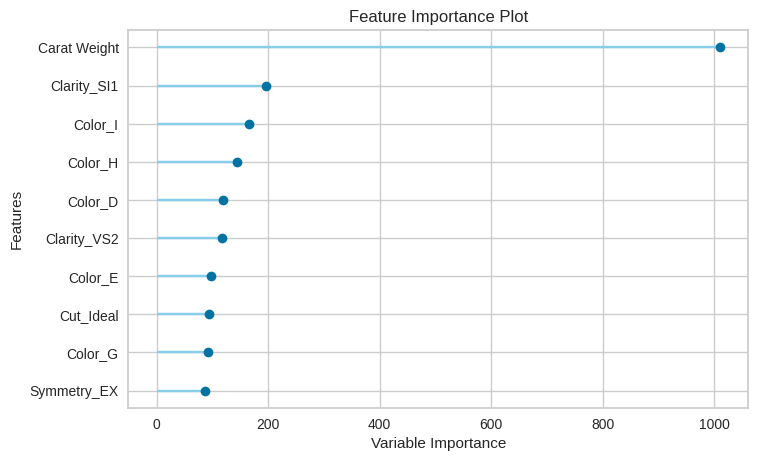

In [17]:
# check feature importance
plot_model(lightgbm, plot = 'feature')

Guardar  Modelo 

In [18]:
# finalize the model
final_best = finalize_model(lightgbm)
# save model to disk
save_model(final_best, 'diamond-pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                                                                          max_depth=-1,
                                                                          min_child_samples=20,
                                                                          min_child_weight=0.001,
                               